In [1]:
%load_ext autoreload
%autoreload 2

In [21]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from src.orderbook_data import OrderbookData
from src.vol_analyzer import VolAnalyzer
matplotlib.rcParams.update({'font.size': 13})

In [22]:
# specify your path to data
data_path = '/Users/vadimpy/dev/hft_assessment/data_keeper/binance_stream_traces'
ob_fname = 'btcusdt@depth20@100ms_from_2022-02-20_21:06:57_to_2022-02-20_21:36:57.json'

In [23]:
WIN_SIZE = 600

In [24]:
ob_data = OrderbookData(f'{data_path}/{ob_fname}')

In [25]:
timeline = np.arange(0, ob_data.nticks * 0.1 / 60, 0.1 / 60)

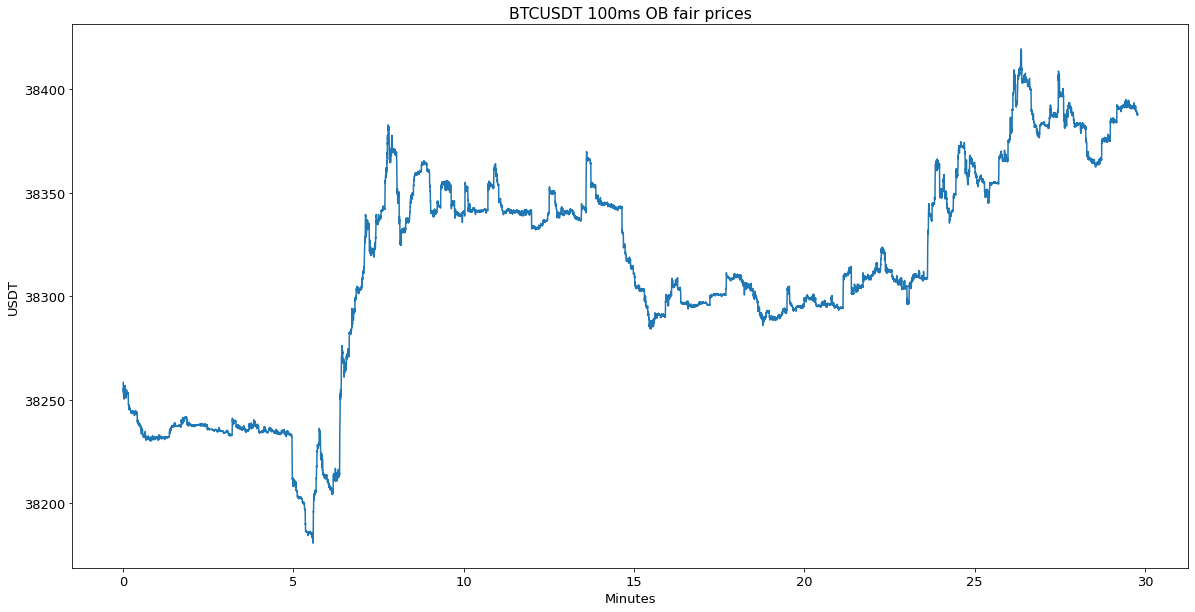

In [26]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlabel('Minutes')
ax.set_ylabel('USDT')
ax.set_title('BTCUSDT 100ms OB fair prices')
ax.plot(timeline, ob_data.fair_prices)
plt.show()

In [27]:
vol = VolAnalyzer.comp_slide_win_var(ob_data.fair_prices, WIN_SIZE) ** 0.5
log_ret_var = VolAnalyzer.comp_log_return_var(ob_data.fair_prices, WIN_SIZE) ** 0.5

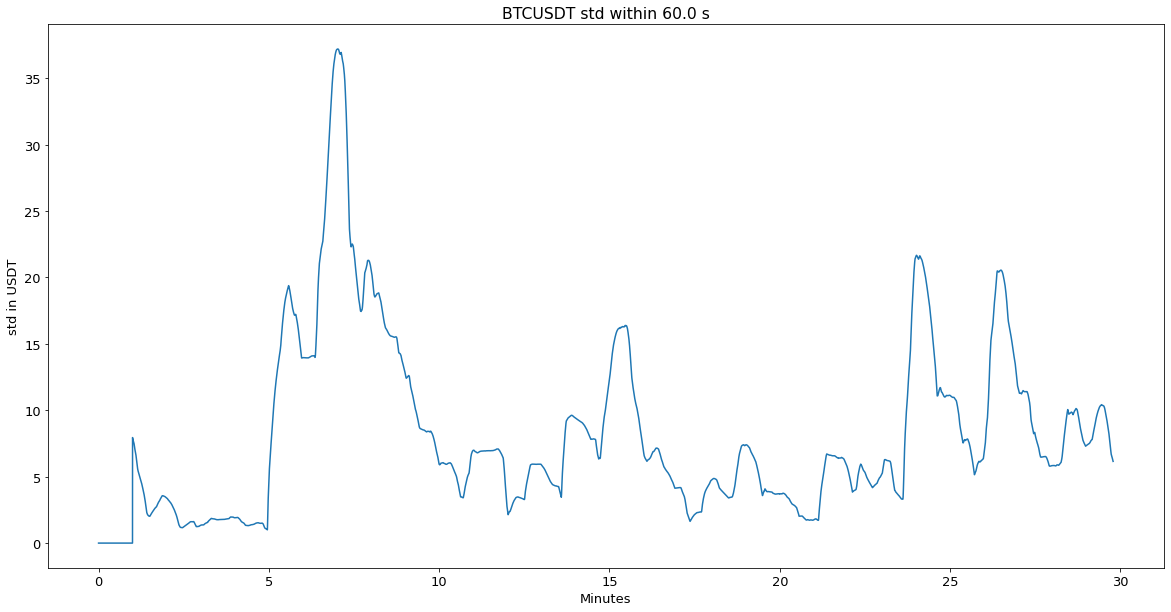

In [28]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlabel('Minutes')
ax.set_ylabel('std in USDT')
ax.set_title(f'BTCUSDT std within {WIN_SIZE / 10} s')
ax.plot(timeline, vol)
plt.show()

In [29]:
assert np.isclose(vol[200+WIN_SIZE-1], ob_data.fair_prices[200:200+WIN_SIZE].var(ddof=1) ** 0.5, rtol=1e-4)

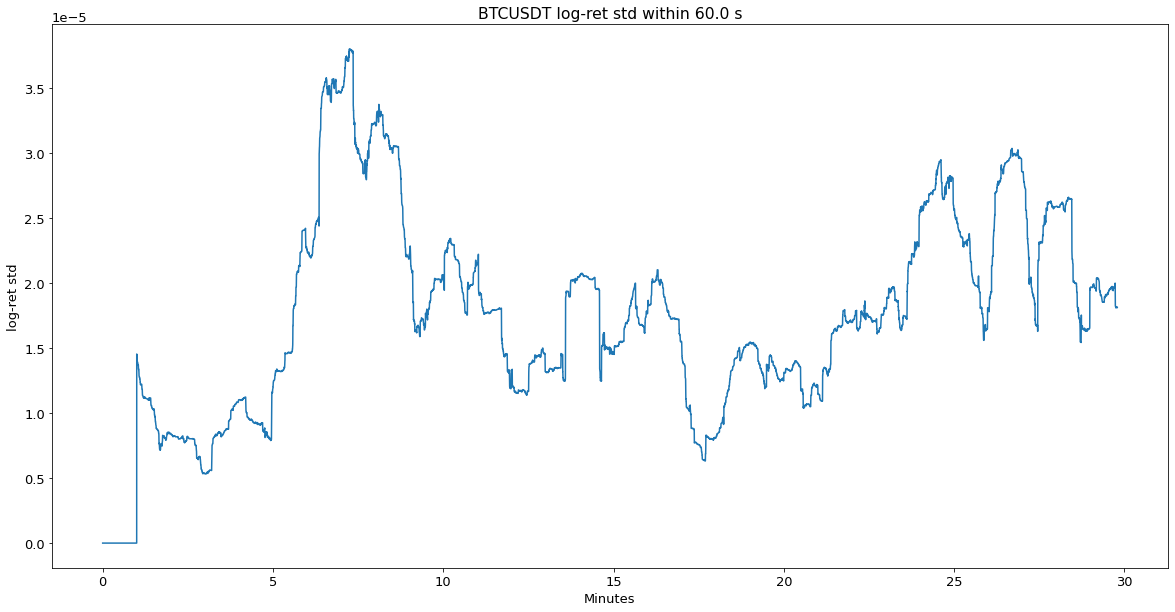

In [30]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlabel('Minutes')
ax.set_ylabel('log-ret std')
ax.set_title(f'BTCUSDT log-ret std within {WIN_SIZE / 10} s')
ax.plot(timeline, log_ret_var)
plt.show()

In [31]:
win_mean = VolAnalyzer.comp_slide_win_mean(ob_data.fair_prices, WIN_SIZE)
assert np.isclose(win_mean[200+WIN_SIZE-1], ob_data.fair_prices[200:200+WIN_SIZE].mean(), rtol=1e-4)

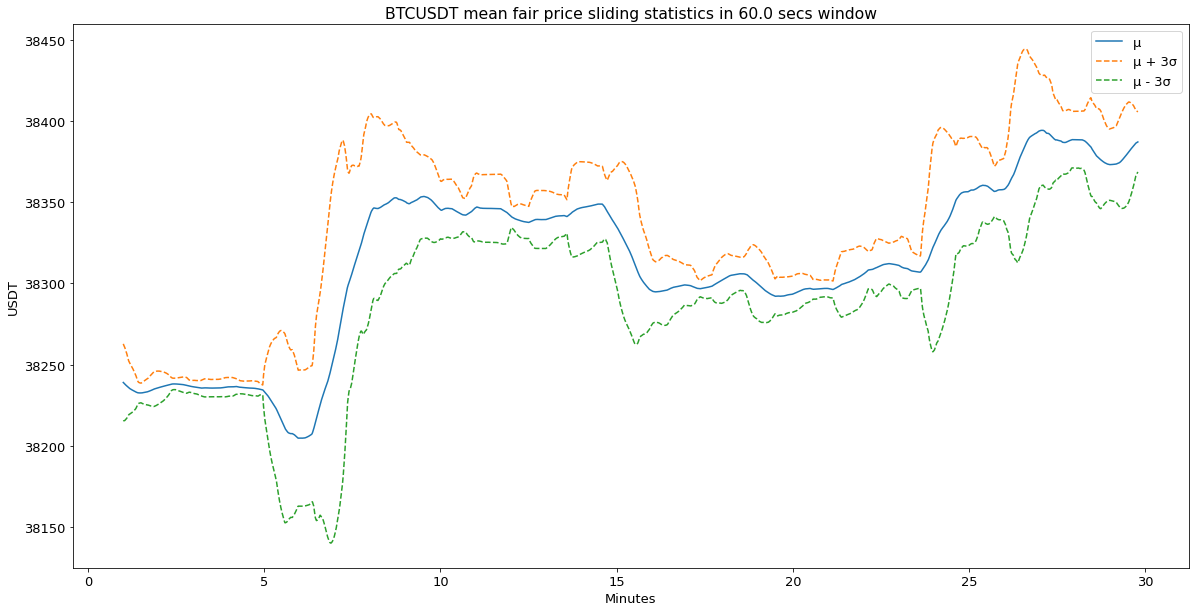

In [32]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.set_xlabel('Minutes')
ax.set_ylabel('USDT')
ax.set_title(f'BTCUSDT mean fair price sliding statistics in {WIN_SIZE / 10} secs window')

ax.plot(timeline[WIN_SIZE:], win_mean[WIN_SIZE:], label='μ')
ax.plot(timeline[WIN_SIZE:], win_mean[WIN_SIZE:] + 3 * vol[WIN_SIZE:], '--', label='μ + 3σ')
ax.plot(timeline[WIN_SIZE:], win_mean[WIN_SIZE:] - 3 * vol[WIN_SIZE:], '--', label='μ - 3σ')

ax.legend()

plt.show()

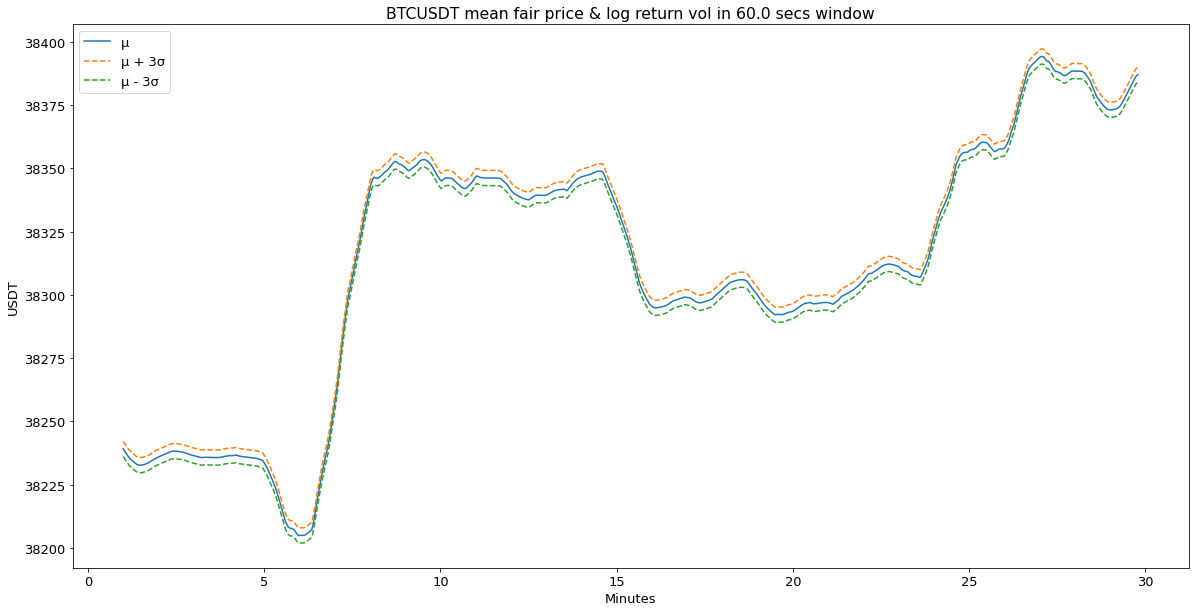

In [33]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.set_xlabel('Minutes')
ax.set_ylabel('USDT')
ax.set_title(f'BTCUSDT mean fair price & log return vol in {WIN_SIZE / 10} secs window')

ax.plot(timeline[WIN_SIZE:], win_mean[WIN_SIZE:], label='μ')
ax.plot(timeline[WIN_SIZE:], win_mean[WIN_SIZE:] + 3 * np.exp(log_ret_var[WIN_SIZE:]), '--', label='μ + 3σ')
ax.plot(timeline[WIN_SIZE:], win_mean[WIN_SIZE:] - 3 * np.exp(log_ret_var[WIN_SIZE:]), '--', label='μ - 3σ')

ax.legend()

plt.show()

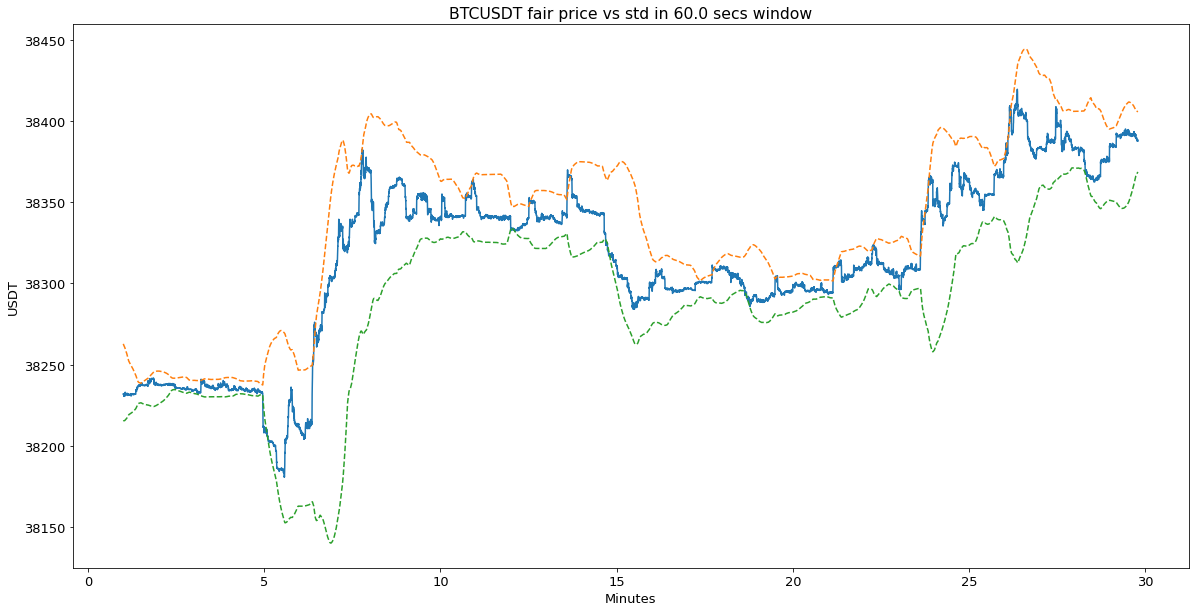

In [34]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.set_xlabel('Minutes')
ax.set_ylabel('USDT')
ax.set_title(f'BTCUSDT fair price vs std in {WIN_SIZE / 10} secs window')

ax.plot(timeline[WIN_SIZE:], ob_data.fair_prices[WIN_SIZE:], label='Fair price')
ax.plot(timeline[WIN_SIZE:], win_mean[WIN_SIZE:] + 3 * vol[WIN_SIZE:], '--', label='μ + 3σ')
ax.plot(timeline[WIN_SIZE:], win_mean[WIN_SIZE:] - 3 * vol[WIN_SIZE:], '--', label='μ - 3σ')
plt.show()

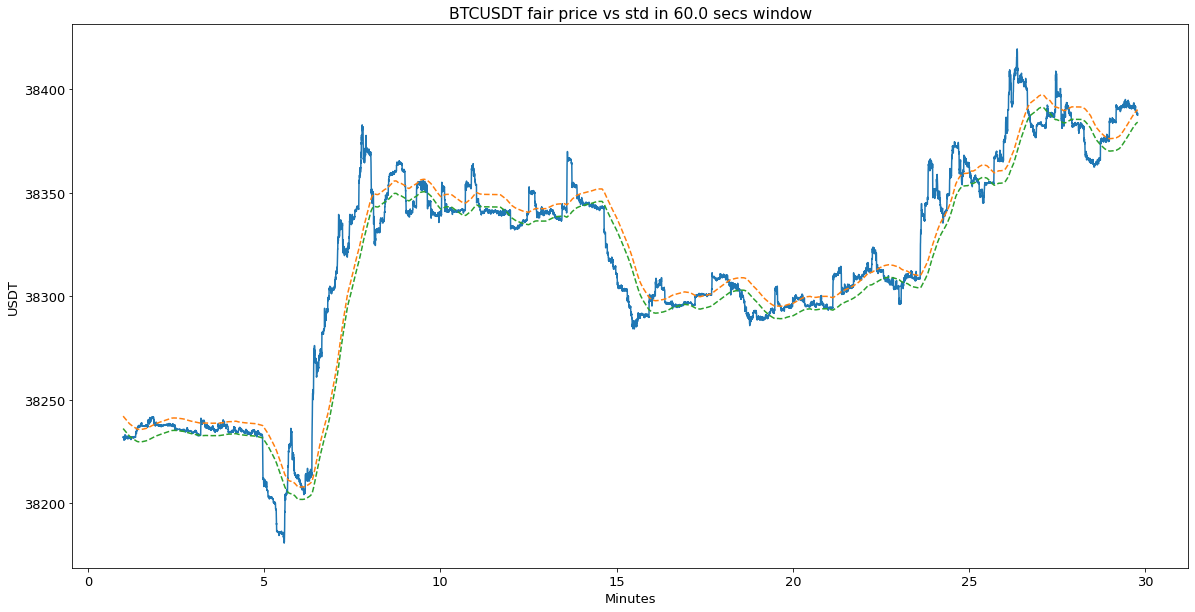

In [35]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.set_xlabel('Minutes')
ax.set_ylabel('USDT')
ax.set_title(f'BTCUSDT fair price vs std in {WIN_SIZE / 10} secs window')

ax.plot(timeline[WIN_SIZE:], ob_data.fair_prices[WIN_SIZE:], label='Fair price')
ax.plot(timeline[WIN_SIZE:], win_mean[WIN_SIZE:] + 3 * np.exp(log_ret_var[WIN_SIZE:]), '--', label='μ + 3σ')
ax.plot(timeline[WIN_SIZE:], win_mean[WIN_SIZE:] - 3 * np.exp(log_ret_var[WIN_SIZE:]), '--', label='μ - 3σ')

plt.show()

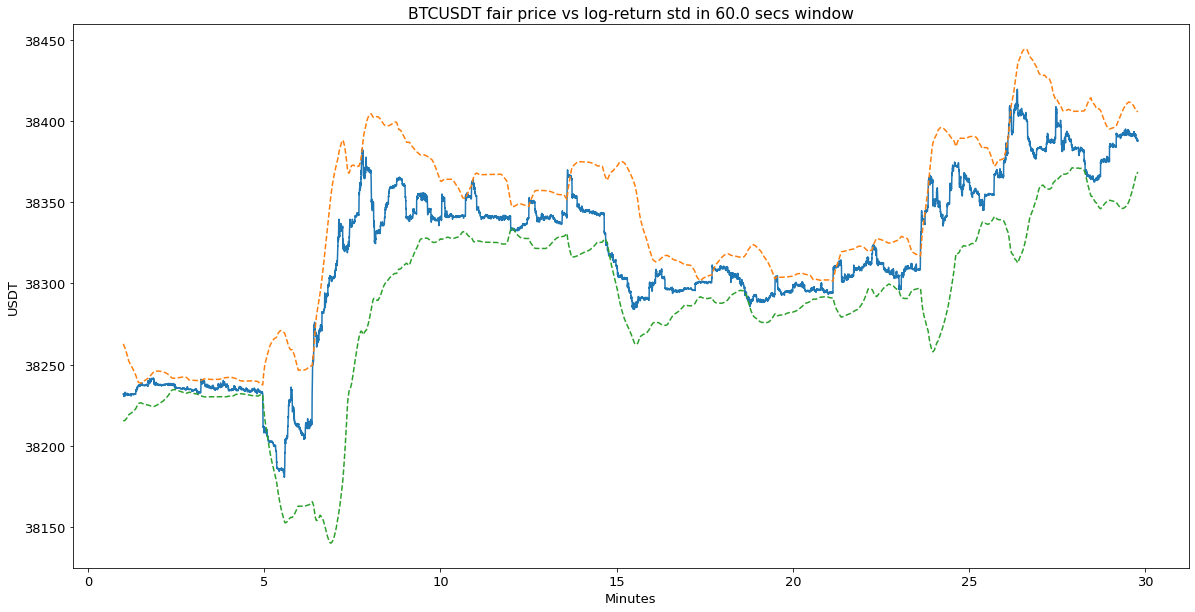

In [36]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.set_xlabel('Minutes')
ax.set_ylabel('USDT')
ax.set_title(f'BTCUSDT fair price vs log-return std in {WIN_SIZE / 10} secs window')

ax.plot(timeline[WIN_SIZE:], ob_data.fair_prices[WIN_SIZE:], label='Fair price')
ax.plot(timeline[WIN_SIZE:], win_mean[WIN_SIZE:] + 3 * vol[WIN_SIZE:], '--', label='μ + 3σ')
ax.plot(timeline[WIN_SIZE:], win_mean[WIN_SIZE:] - 3 * vol[WIN_SIZE:], '--', label='μ - 3σ')
plt.show()